<a href="https://colab.research.google.com/github/neel26desai/cmpe258_neural_network_advanced/blob/main/Classification_and_Data_Augmentation_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of time points
n_points = 100

# Create a datetime range starting from Jan 1, 2020
dates = pd.date_range(start='2020-01-01', periods=n_points, freq='D')

# Generate features
feature_1 = 0.5 * np.arange(n_points) + 10 * np.sin(0.2 * np.arange(n_points)) + 5 * np.random.normal(size=n_points)
feature_2 = 1.5 * np.arange(n_points) + 8 * np.sin(0.3 * np.arange(n_points)) + 3 * np.random.normal(size=n_points)
feature_3 = 2.0 * np.arange(n_points) + 6 * np.sin(0.4 * np.arange(n_points)) + 2 * np.random.normal(size=n_points)

# Calculate median of Feature_1
median_feature_1 = np.median(feature_1)

# Create binary classification feature based on Feature_1
classification_feature = (feature_1 > median_feature_1).astype(int)

# Combine into a DataFrame
df = pd.DataFrame({
    'Time': dates,
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3,
    'Target': classification_feature
})

print(df.head())


        Time  Feature_1  Feature_2  Feature_3  Target
0 2020-01-01   2.483571  -4.246112   0.715575       0
1 2020-01-02   1.795372   2.602226   5.458079       0
2 2020-01-03   8.132626   6.488996  10.470239       0
3 2020-01-04  14.761574   8.359783  13.699839       0
4 2020-01-05   8.002794  12.972456  11.242103       0


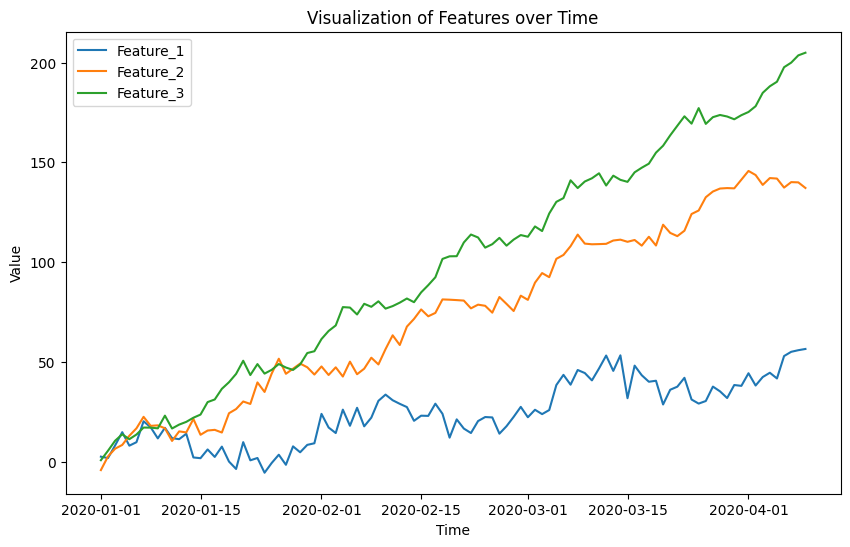

In [5]:
import matplotlib.pyplot as plt

# Plot all features with respect to time
plt.figure(figsize=(10, 6))

plt.plot(df['Time'], df['Feature_1'], label='Feature_1')
plt.plot(df['Time'], df['Feature_2'], label='Feature_2')
plt.plot(df['Time'], df['Feature_3'], label='Feature_3')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Visualization of Features over Time')
plt.legend()
plt.show()


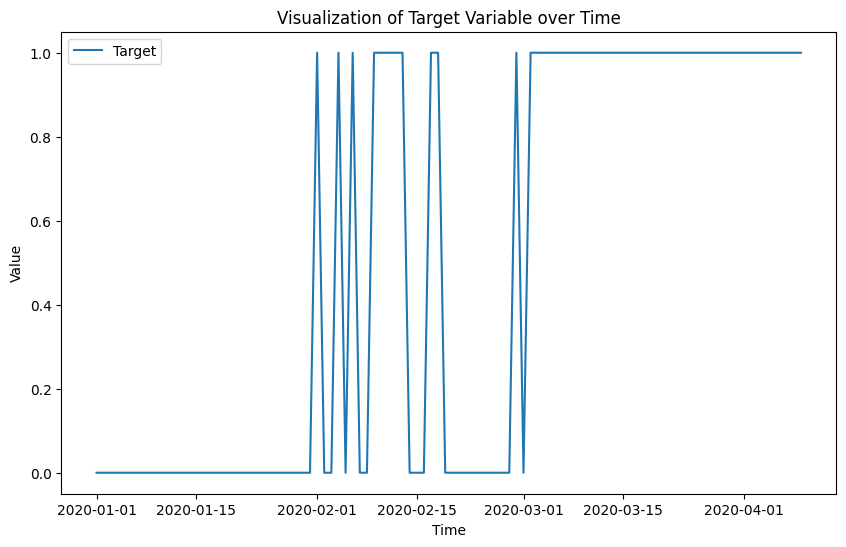

In [6]:
import matplotlib.pyplot as plt
# Plot the target variable over time
plt.figure(figsize=(10, 6))

plt.plot(df['Time'], df['Target'], label='Target')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Visualization of Target Variable over Time')
plt.legend()
plt.show()


#Building a Base Model

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
# Feature matrix and target vector
X = df[['Feature_1']].values
y = df['Target'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=10, validation_data=(X_test,y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

Epoch 1/5
8/8 [==============================] - 2s 40ms/step - loss: 0.6830 - accuracy: 0.5125 - val_loss: 0.6822 - val_accuracy: 0.4500
Epoch 2/5
8/8 [==============================] - 0s 11ms/step - loss: 0.6751 - accuracy: 0.5000 - val_loss: 0.6744 - val_accuracy: 0.4500
Epoch 3/5
8/8 [==============================] - 0s 11ms/step - loss: 0.6679 - accuracy: 0.5125 - val_loss: 0.6672 - val_accuracy: 0.4500
Epoch 4/5
8/8 [==============================] - 0s 10ms/step - loss: 0.6610 - accuracy: 0.5125 - val_loss: 0.6613 - val_accuracy: 0.4500
Epoch 5/5
1/1 [==============================] - 0s 142ms/step - loss: 0.6569 - accuracy: 0.9500
Test loss: 0.6568706631660461, Test accuracy: 0.949999988079071


# Augmentation

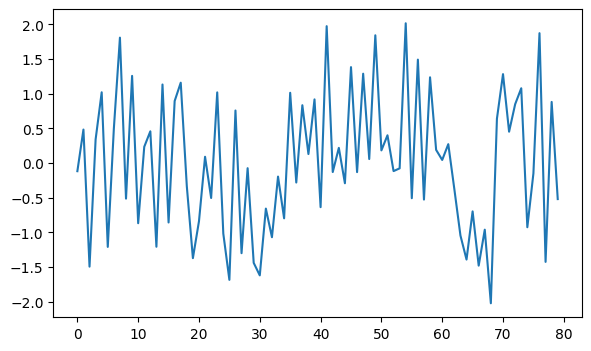

In [28]:
#jittering, adding random noise to data
def DA_Jitter(X, sigma=0.05):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise

jittered_feature1 = DA_Jitter(X_train)
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)
ax.plot(jittered_feature1)

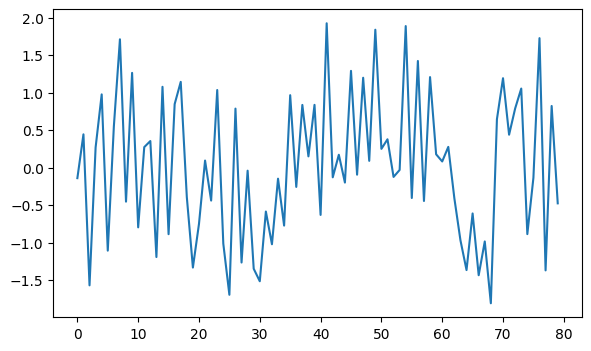

In [29]:
#scaling, zoom-in-out of the data, applying constant nosie to the entire data
def DA_Scaling(X, sigma=0.1):
    scalingFactor = np.random.normal(loc=1.0, scale=sigma, size=(1,X.shape[1])) # shape=(1,3)
    myNoise = np.matmul(np.ones((X.shape[0],1)), scalingFactor)
    return X*myNoise


feature_1_scaled_with_noise = DA_Scaling(X_train)
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)
ax.plot(feature_1_scaled_with_noise)

In [37]:
from scipy.interpolate import CubicSpline      # for warping
#magnitude wrapping
sigma = 0.2
knot = 4
def GenerateRandomCurves(X, sigma=0.2, knot=4):
    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_x = CubicSpline(xx[:,0], yy[:,0])
    return np.array([cs_x(x_range)]).transpose()



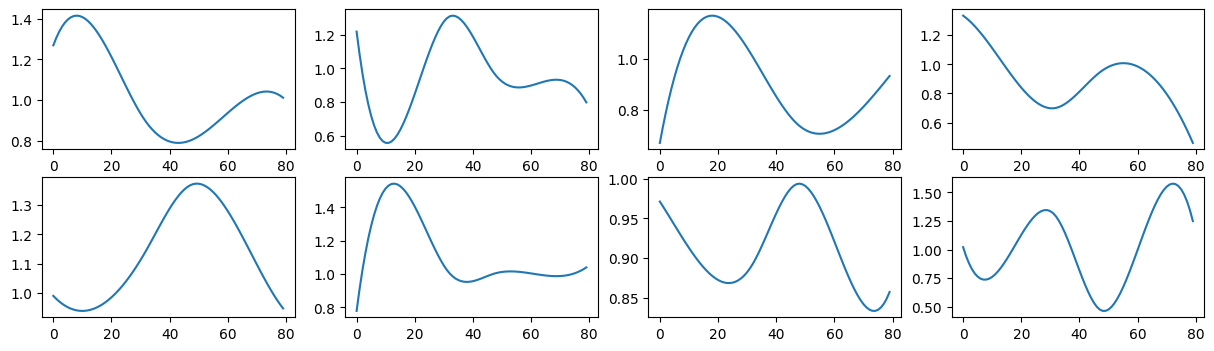

In [39]:
## Random curves around 1.0
fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(GenerateRandomCurves(X_train, sigma))


In [40]:
def DA_MagWarp(X, sigma):
    return X * GenerateRandomCurves(X, sigma)


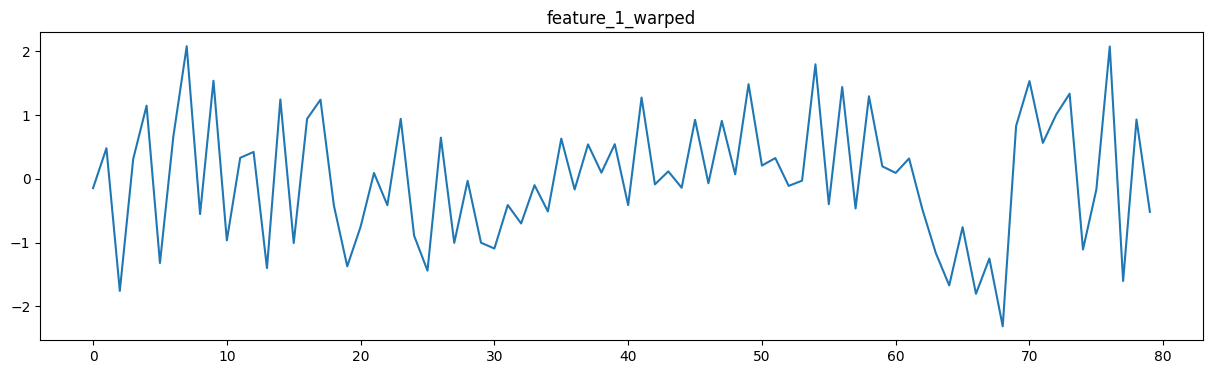

In [47]:
feature_1_warped = DA_MagWarp(X_train, sigma)
fig = plt.figure(figsize=(15,4))
plt.plot(feature_1_warped)
plt.title('feature_1_warped')
plt.show()


#Building Models using the Augmented Data

In [51]:
X_train_new = np.concatenate((X_train, jittered_feature1, feature_1_scaled_with_noise, feature_1_warped), axis=0)
y_train_new = np.concatenate((y_train, y_train, y_train, y_train), axis=0)

In [52]:
X_train_new.shape

(320, 1)

In [53]:
# Build the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_new, y_train_new, epochs=5, batch_size=10, validation_data=(X_test,y_test))

Epoch 1/5
32/32 [==============================] - 1s 8ms/step - loss: 0.6793 - accuracy: 0.6344 - val_loss: 0.6537 - val_accuracy: 0.9500
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6276 - accuracy: 0.9750 - val_loss: 0.6009 - val_accuracy: 0.9500
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.9750 - val_loss: 0.5478 - val_accuracy: 0.9500
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 0.9750 - val_loss: 0.4932 - val_accuracy: 0.9500
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.9750 - val_loss: 0.4422 - val_accuracy: 0.9500


After performing augmentation on the train set, we found that the accuracyon the validaation set remained almost the same, however the model's performance on the training dataset saw a massive  improvement